In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from seaborn import boxplot
from seaborn import swarmplot
from seaborn import scatterplot

In [3]:
cleaned_data = pd.read_csv('Cleaned Data', index_col = [0])

In [4]:
cleaned_data.head(5)

,Unnamed: 0,match_id,year,round,local,visitor,league_id,team1_id_season,team2_id_season,team1_id,...,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,form_visitor,match_winner
0,0,37467,2016,2,Villarreal,Espanyol,15373,214625,214629,2716,...,3,1.0,0.0,0.0,1,0,1.0,5,w,0
1,1,37471,2016,2,R. Sociedad,Real Sporting,15373,214631,214619,2120,...,1,0.0,1.0,0.0,0,0,0.0,13,d,1
2,2,37463,2016,2,Barcelona,Málaga,15373,214620,214628,429,...,1,0.0,1.0,0.0,0,0,0.0,9,d,0
3,3,37457,2016,2,Celta,Rayo Vallecano,15373,214627,214630,712,...,1,0.0,1.0,0.0,0,0,0.0,11,d,0
4,4,37469,2016,2,Real Madrid,Real Betis,15373,214621,214618,2107,...,1,0.0,1.0,0.0,1,1,0.0,6,d,0


In [5]:
plotting_data = pd.read_csv('plotting_data', index_col = [0])

As it was explained in the last notebook, we save two different dataset, one including team IDs and abbreviatures and other without them.

### Researching into data values

In [8]:
plotting_data.astype(int).describe()

,year,round,division,local_goals,visitor_goals,points_local,wins_local,draws_local,losses_local,gf_local,...,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,match_winner
count,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,...,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000
mean,2018.500000,20.000000,1.523810,1.394895,1.029816,25.480266,6.642643,5.613900,6.743458,22.883955,...,11.193908,25.785500,6.744316,5.612184,6.643501,23.108752,22.903904,0.204848,10.853711,0.812312
std,1.708008,10.678224,0.499486,1.188878,1.041805,16.878922,4.891017,3.757993,4.815301,15.385598,...,6.099770,16.941128,4.914267,3.774109,4.788052,15.510797,14.853435,12.348645,6.089588,0.822706
min,2016.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,1.000000,0.000000
25%,2017.000000,11.000000,1.000000,1.000000,0.000000,12.000000,3.000000,3.000000,3.000000,11.000000,...,6.000000,12.000000,3.000000,3.000000,3.000000,11.000000,11.000000,-6.000000,6.000000,0.000000
50%,2018.500000,20.000000,2.000000,1.000000,1.000000,23.000000,6.000000,5.000000,6.000000,21.000000,...,11.000000,24.000000,6.000000,5.000000,6.000000,22.000000,22.000000,0.000000,11.000000,1.000000
75%,2020.000000,29.000000,2.000000,2.000000,2.000000,37.000000,9.000000,8.000000,10.000000,33.000000,...,16.000000,37.000000,10.000000,8.000000,10.000000,33.000000,33.000000,5.000000,16.000000,2.000000
max,2021.000000,38.000000,2.000000,10.000000,8.000000,90.000000,27.000000,19.000000,27.000000,112.000000,...,22.000000,90.000000,28.000000,20.000000,26.000000,109.000000,89.000000,80.000000,22.000000,2.000000


In [9]:
plotting_data['match_winner'].astype(str)

0       0
1       1
2       0
3       0
4       0
       ..
4657    0
4658    0
4659    2
4660    1
4661    0
Name: match_winner, Length: 4662, dtype: object

[]

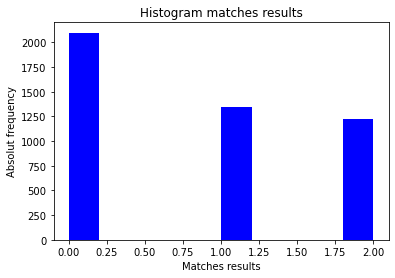

In [10]:
plt.hist(cleaned_data['match_winner'], color= 'blue', label = True, rwidth = 1.5)
plt.title('Histogram matches results')
plt.xlabel('Matches results')
plt.ylabel('Absolut frequency')
plt.plot()

[]

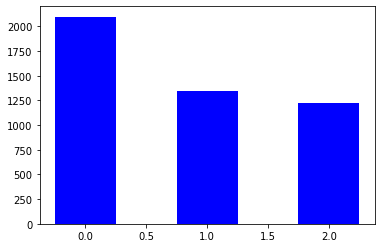

In [11]:
d = np.diff(np.unique(cleaned_data['match_winner'])).min()
left_of_first_bin = cleaned_data['match_winner'].min() - float(d)/2
right_of_last_bin = cleaned_data['match_winner'].max() + float(d)/2
plt.hist(cleaned_data['match_winner'], np.arange(left_of_first_bin, right_of_last_bin + d, d),color= 'blue', label = True, rwidth = 0.5, histtype =  'barstacked' )
plt.plot()

In [32]:
sns.color_palette(palette='pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

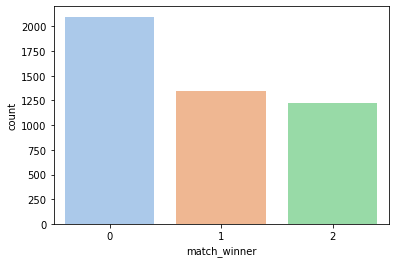

In [35]:
sns.countplot(data = plotting_data, x="match_winner", palette='pastel')

The result is reasonable, there are more local wins, and a similar number of draws and visitor wins.

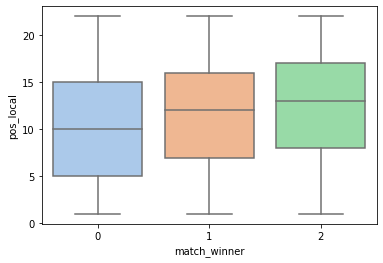

In [38]:
sns.boxplot(x="match_winner", y="pos_local", data=plotting_data, orient ='v', palette='pastel')

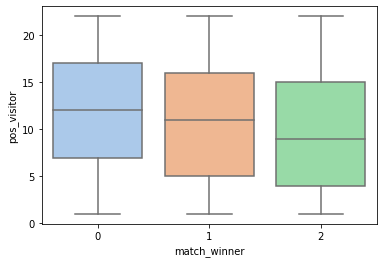

In [44]:
sns.boxplot(x="match_winner", y="pos_visitor", data=plotting_data, orient ='v', palette='pastel')

In [15]:
plotting_data.head(5)

,year,round,division,local_goals,visitor_goals,points_local,wins_local,draws_local,losses_local,gf_local,...,pos_local,points_visitor,wins_visitor,draws_visitor,losses_visitor,gf_visitor,ga_visitor,avg_visitor,pos_visitor,match_winner
0,2016,2,1,3,1,1,0.0,1.0,0.0,1,...,7,3,1.0,0.0,0.0,1,0,1.0,5,0
1,2016,2,1,0,0,1,0.0,1.0,0.0,0,...,10,1,0.0,1.0,0.0,0,0,0.0,13,1
2,2016,2,1,1,0,3,1.0,0.0,0.0,1,...,4,1,0.0,1.0,0.0,0,0,0.0,9,0
3,2016,2,1,3,0,3,1.0,0.0,0.0,2,...,2,1,0.0,1.0,0.0,0,0,0.0,11,0
4,2016,2,1,5,0,1,0.0,1.0,0.0,0,...,12,1,0.0,1.0,0.0,1,1,0.0,6,0


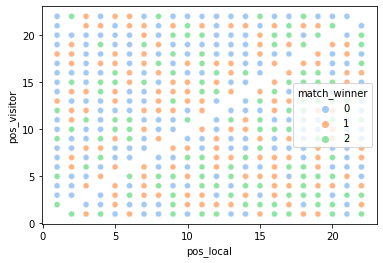

In [45]:
sns.scatterplot(data=plotting_data, x="pos_local", y="pos_visitor", hue="match_winner", palette='pastel')

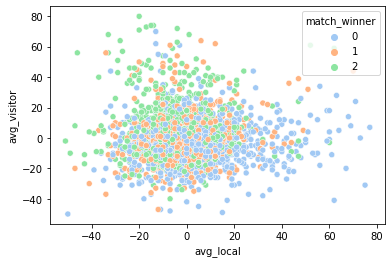

In [46]:
sns.scatterplot(data=plotting_data, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')

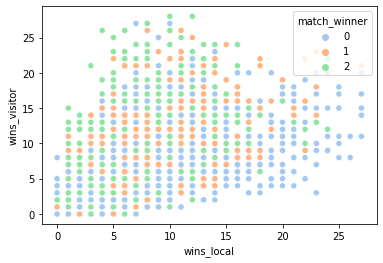

In [47]:
sns.scatterplot(data=plotting_data, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')

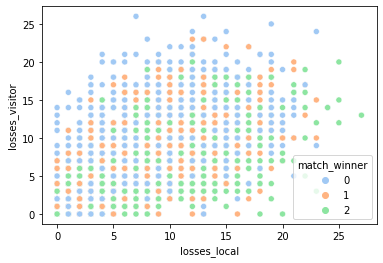

In [48]:
sns.scatterplot(data=plotting_data, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')

### Plotting by rounds

In [20]:
plotting_data_round10 = plotting_data.loc[plotting_data['round'] <= 10]
plotting_data_round10_20 = plotting_data.loc[(10 < plotting_data['round']) & (plotting_data['round']<= 20)]
plotting_data_round20_30 = plotting_data.loc[(20 < plotting_data['round']) & (plotting_data['round']<= 30)]
plotting_data_round30 = plotting_data.loc[plotting_data['round'] > 30]

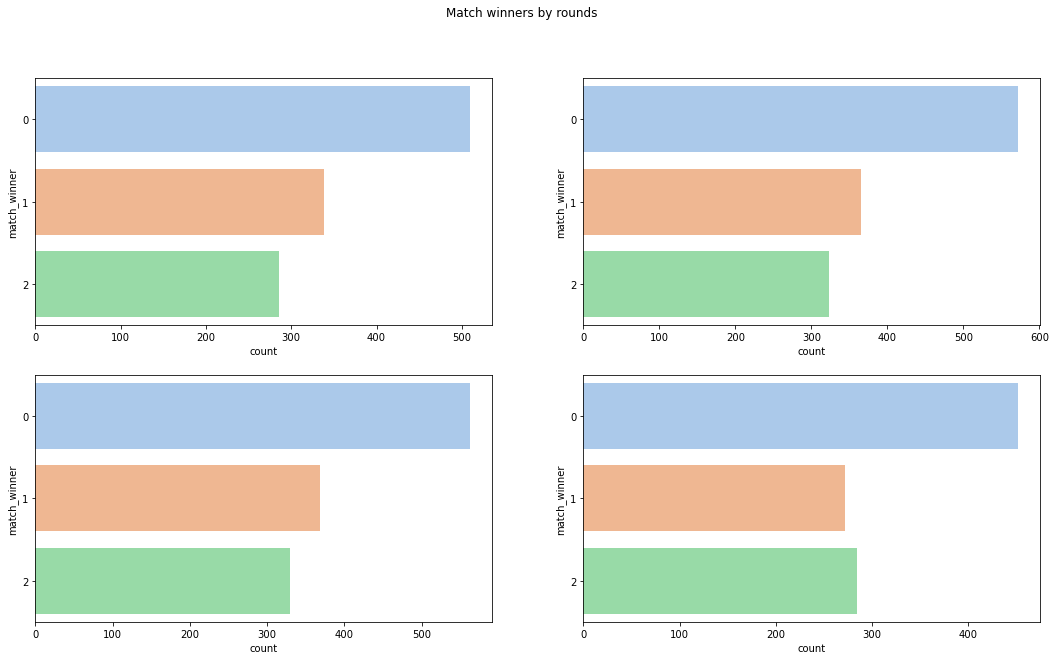

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners by rounds')

sns.countplot(ax=axes[0, 0], data=plotting_data_round10, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 1], data=plotting_data_round10_20, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 0], data=plotting_data_round20_30, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 1], data=plotting_data_round30, y='match_winner', palette='pastel')

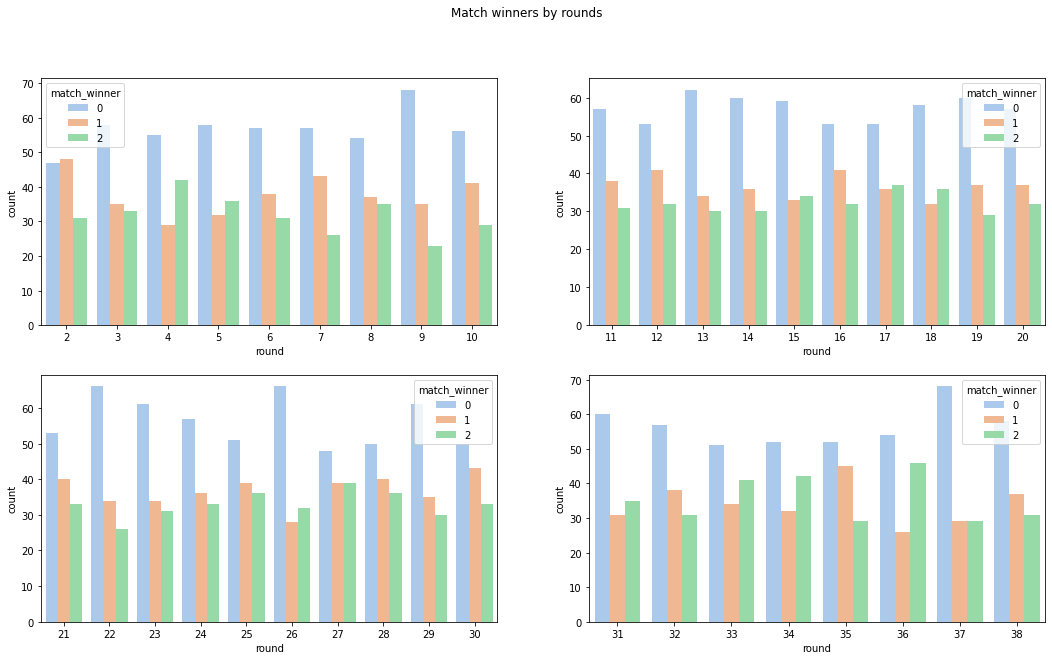

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners by rounds')

sns.countplot(ax=axes[0, 0], data=plotting_data_round10, x="round", hue='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 1], data=plotting_data_round10_20, x="round", hue='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 0], data=plotting_data_round20_30, x="round", hue='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 1], data=plotting_data_round30, x="round", hue='match_winner', palette='pastel')

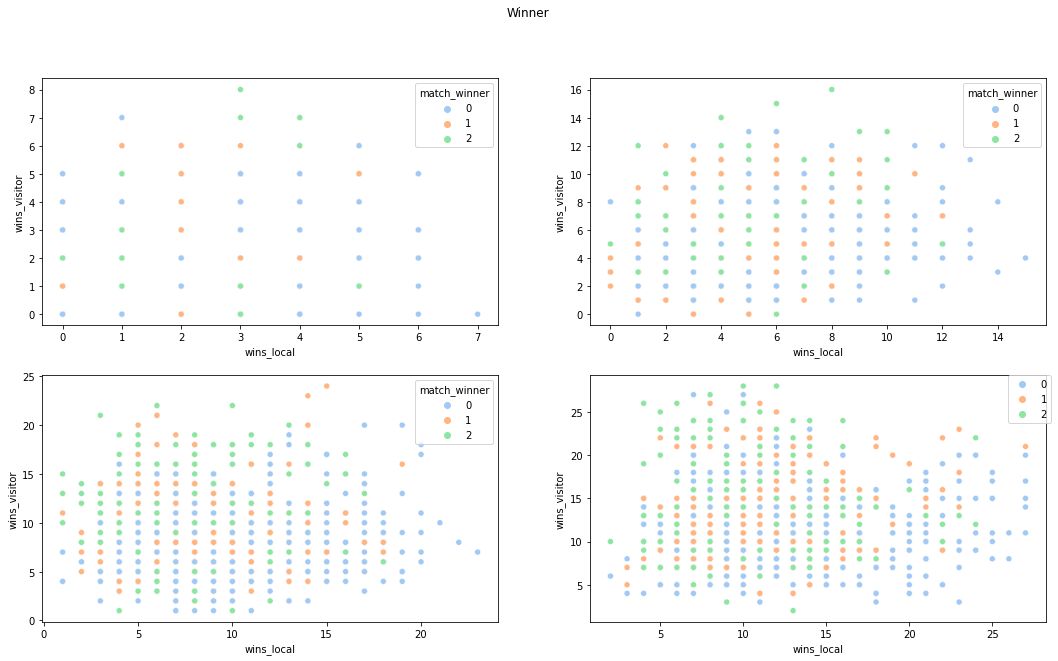

In [49]:
####fuera
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Winner')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

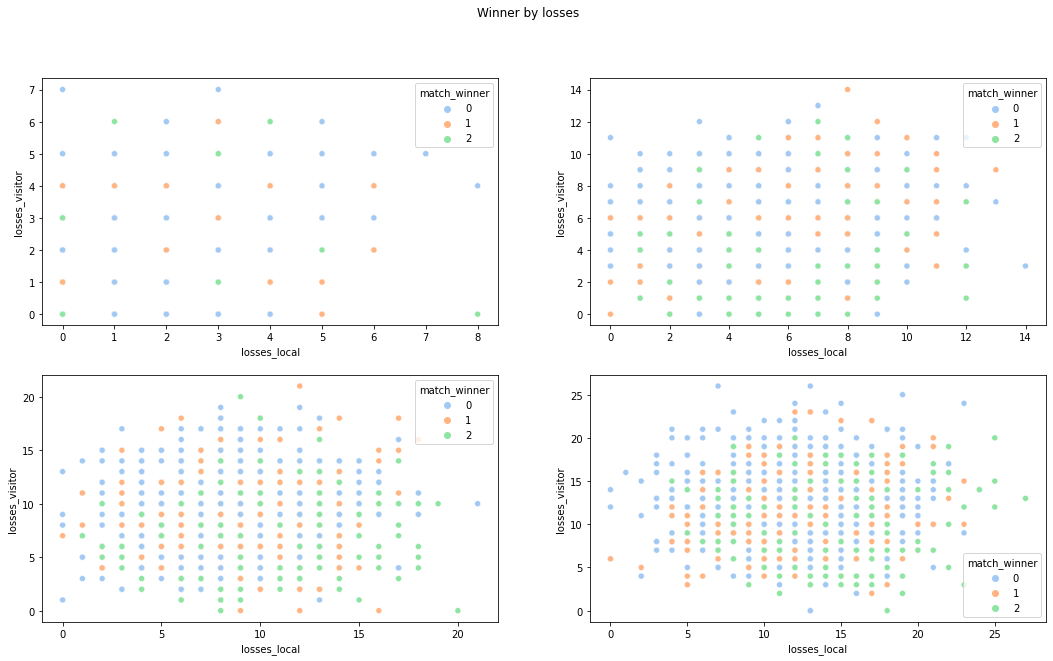

In [50]:
###fuera
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Winner by losses')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')


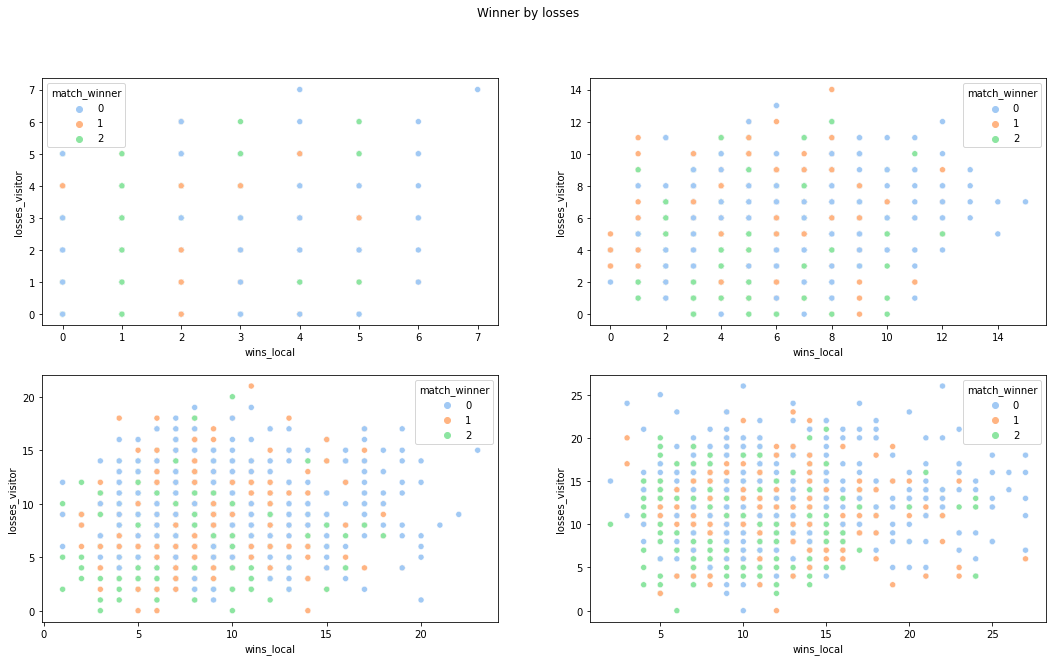

In [51]:
### fuera
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Winner by losses')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="wins_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="wins_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="wins_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="wins_local", y="losses_visitor", hue="match_winner", palette='pastel')


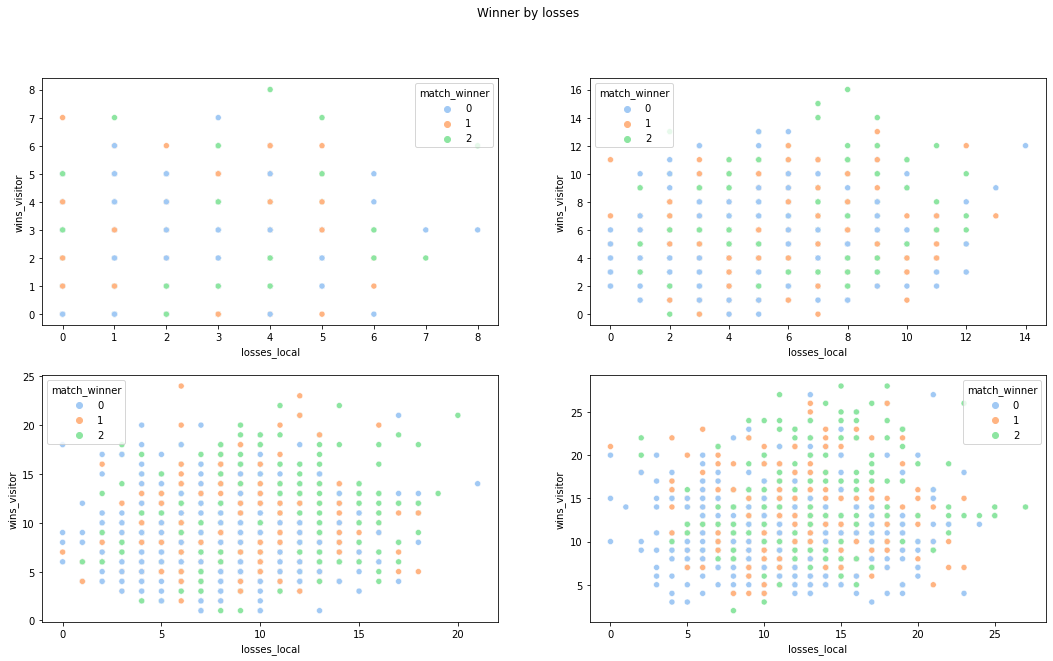

In [52]:
#fueraa
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Winner by losses')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="losses_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="losses_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="losses_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="losses_local", y="wins_visitor", hue="match_winner", palette='pastel')


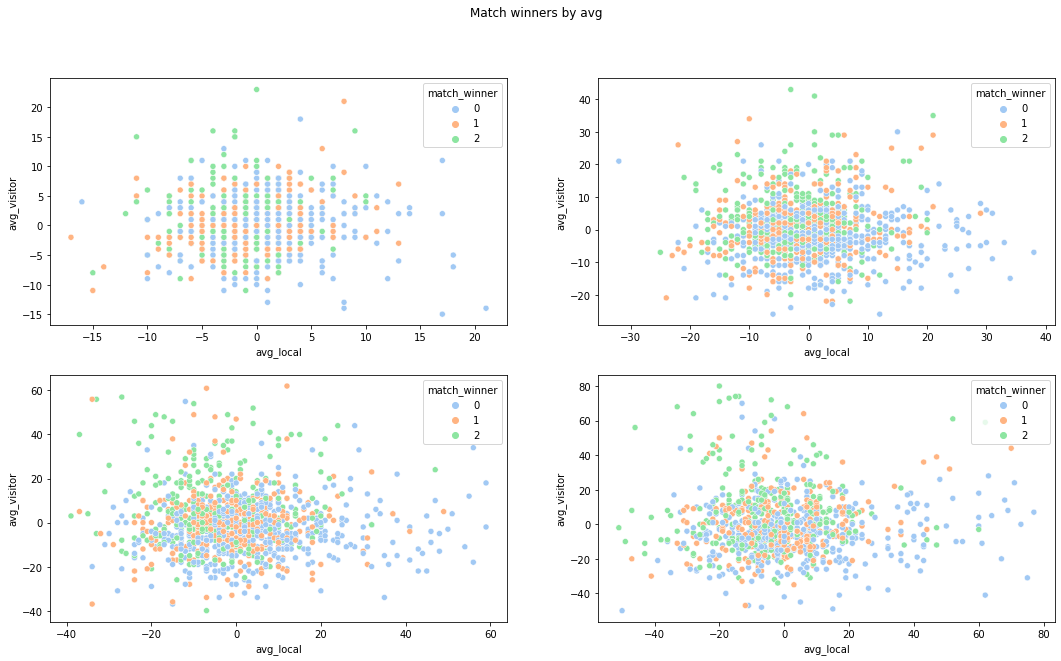

In [53]:
### fuera
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners by avg')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="avg_local", y="avg_visitor", hue="match_winner",palette='pastel' )
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')

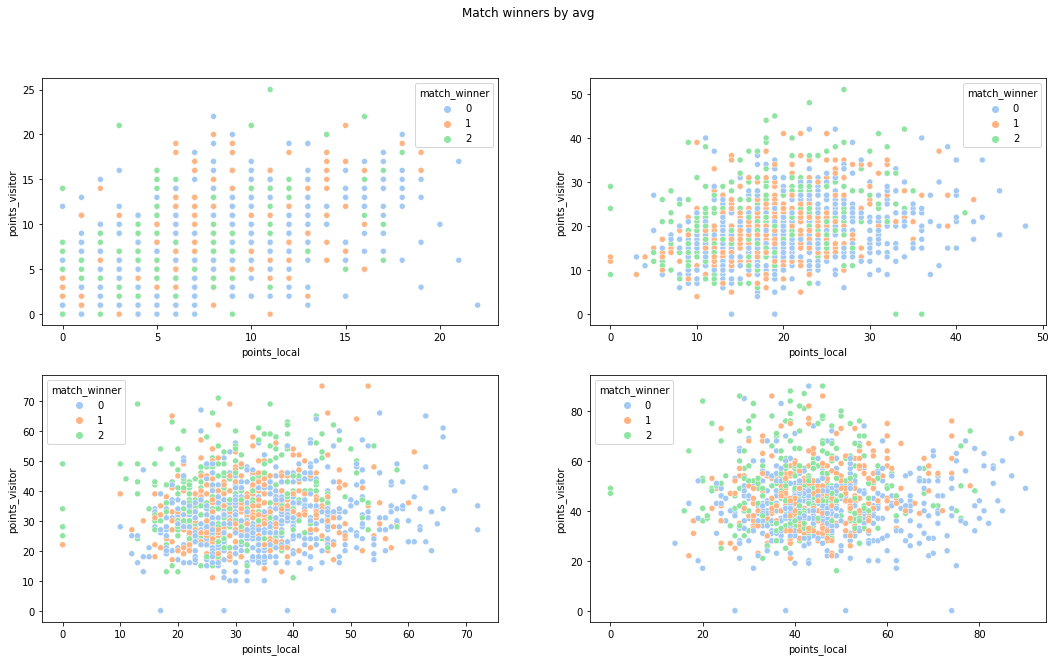

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners by avg')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="points_local", y="points_visitor", hue="match_winner",palette='pastel' )
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="points_local", y="points_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="points_local", y="points_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="points_local", y="points_visitor", hue="match_winner", palette='pastel')

### Plotting by season & division 

In [55]:
plotting_div1 = plotting_data.loc[plotting_data['division'] == 1]
plotting_div2 = plotting_data.loc[plotting_data['division'] == 2]

In [56]:
plotting_div1_2016 = plotting_div1.loc[plotting_data['year'] == 2016]
plotting_div1_2017 = plotting_div1.loc[plotting_data['year'] == 2017]
plotting_div1_2018 = plotting_div1.loc[plotting_data['year'] == 2018]
plotting_div1_2019 = plotting_div1.loc[plotting_data['year'] == 2019]
plotting_div1_2020 = plotting_div1.loc[plotting_data['year'] == 2020]
plotting_div1_2021 = plotting_div1.loc[plotting_data['year'] == 2021]

In [57]:
plotting_div2_2016 = plotting_div2.loc[plotting_data['year'] == 2016]
plotting_div2_2017 = plotting_div2.loc[plotting_data['year'] == 2017]
plotting_div2_2018 = plotting_div2.loc[plotting_data['year'] == 2018]
plotting_div2_2019 = plotting_div2.loc[plotting_data['year'] == 2019]
plotting_div2_2020 = plotting_div2.loc[plotting_data['year'] == 2020]
plotting_div2_2021 = plotting_div2.loc[plotting_data['year'] == 2021]

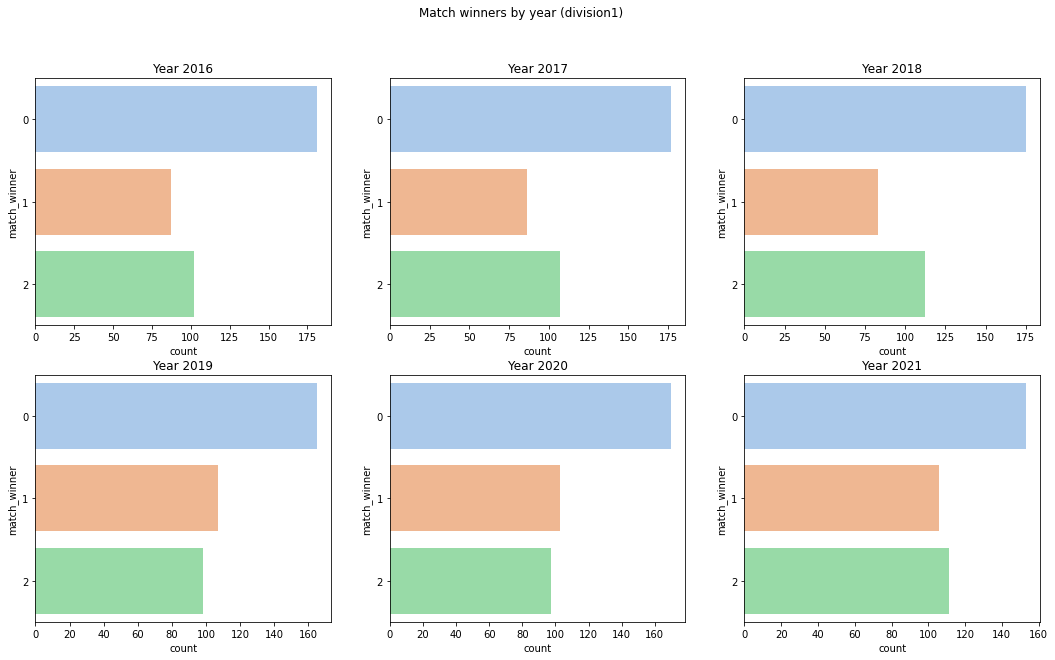

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Match winners by year (division1)')

axes[0,0].set_title('Year 2016')
axes[0,1].set_title('Year 2017')
axes[0,2].set_title('Year 2018')
axes[1,0].set_title('Year 2019')
axes[1,1].set_title('Year 2020')
axes[1,2].set_title('Year 2021')

sns.countplot(ax=axes[0, 0], data=plotting_div1_2016, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 1], data=plotting_div1_2017, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 2], data=plotting_div1_2018, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 0], data=plotting_div1_2019, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 1], data=plotting_div1_2020, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 2], data=plotting_div1_2021, y='match_winner', palette='pastel')

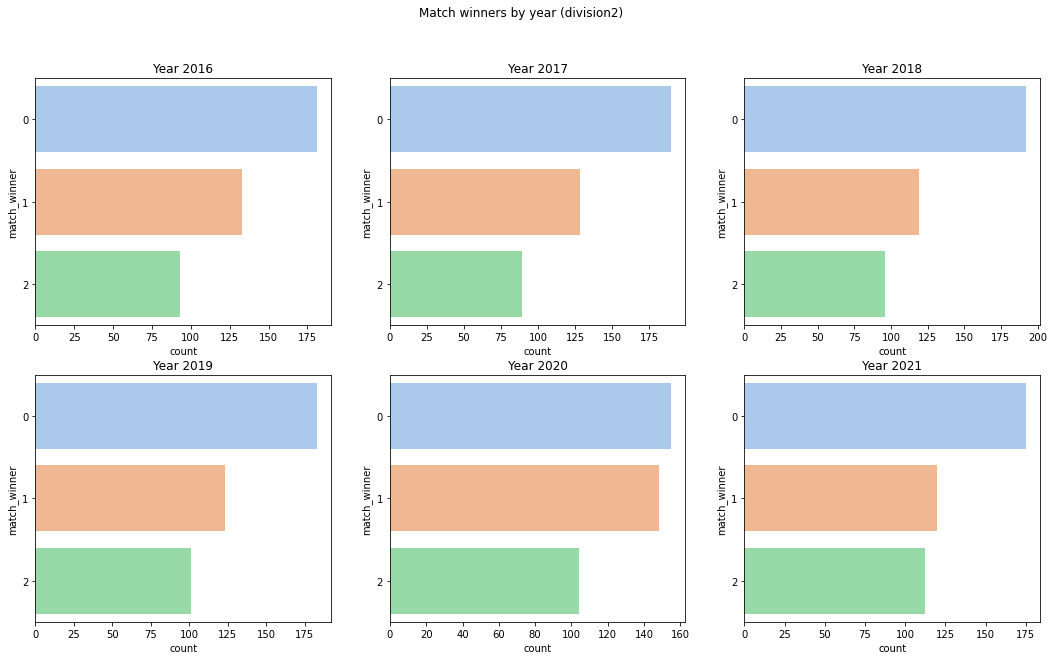

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Match winners by year (division2)')

axes[0,0].set_title('Year 2016')
axes[0,1].set_title('Year 2017')
axes[0,2].set_title('Year 2018')
axes[1,0].set_title('Year 2019')
axes[1,1].set_title('Year 2020')
axes[1,2].set_title('Year 2021')

sns.countplot(ax=axes[0, 0], data=plotting_div2_2016, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 1], data=plotting_div2_2017, y='match_winner', palette='pastel')
sns.countplot(ax=axes[0, 2], data=plotting_div2_2018, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 0], data=plotting_div2_2019, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 1], data=plotting_div2_2020, y='match_winner', palette='pastel')
sns.countplot(ax=axes[1, 2], data=plotting_div2_2021, y='match_winner', palette='pastel')

#### Wins 1st division

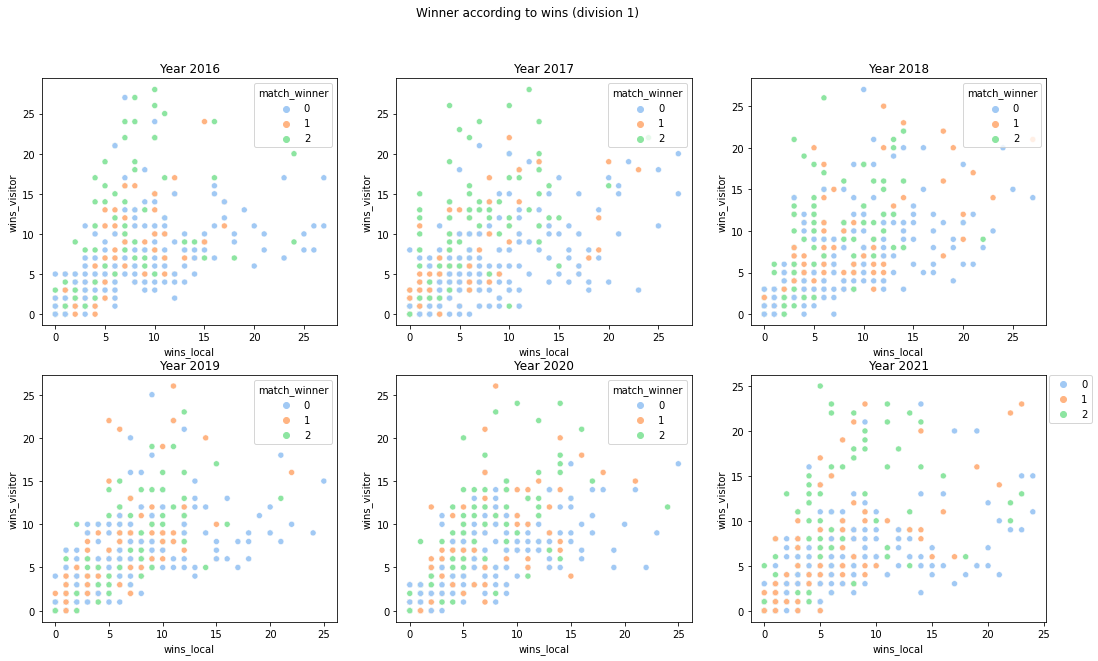

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Winner according to wins (division 1)')

axes[0,0].set_title('Year 2016')
axes[0,1].set_title('Year 2017')
axes[0,2].set_title('Year 2018')
axes[1,0].set_title('Year 2019')
axes[1,1].set_title('Year 2020')
axes[1,2].set_title('Year 2021')

sns.scatterplot(ax=axes[0, 0], data=plotting_div1_2016, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_div1_2017, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 2], data=plotting_div1_2018, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_div1_2019, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_div1_2020, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 2], data=plotting_div1_2021, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

#### Wins 2nd division

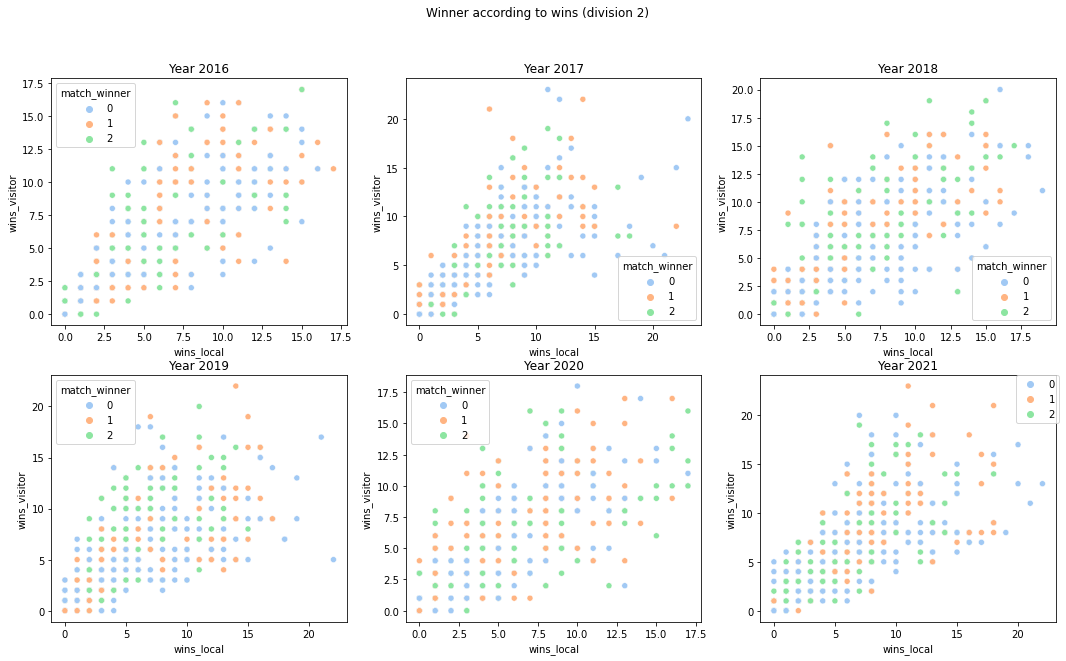

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Winner according to wins (division 2)')

axes[0,0].set_title('Year 2016')
axes[0,1].set_title('Year 2017')
axes[0,2].set_title('Year 2018')
axes[1,0].set_title('Year 2019')
axes[1,1].set_title('Year 2020')
axes[1,2].set_title('Year 2021')

sns.scatterplot(ax=axes[0, 0], data=plotting_div2_2016, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_div2_2017, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 2], data=plotting_div2_2018, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_div2_2019, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_div2_2020, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 2], data=plotting_div2_2021, x="wins_local", y="wins_visitor", hue="match_winner", palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

#### Losses 1st division

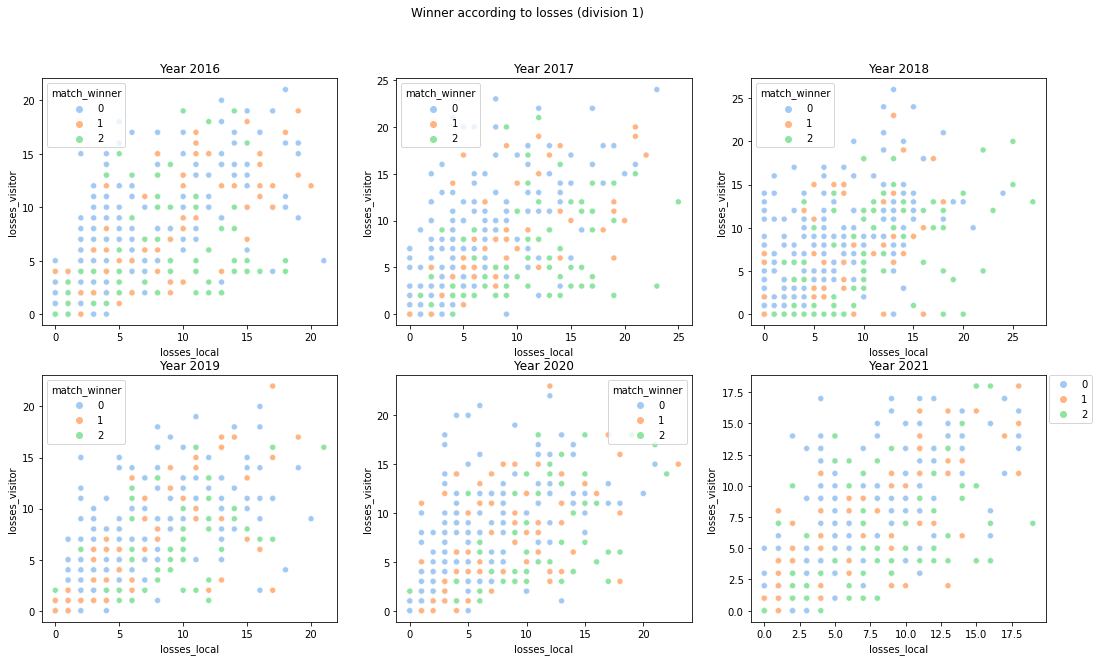

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Winner according to losses (division 1)')

axes[0,0].set_title('Year 2016')
axes[0,1].set_title('Year 2017')
axes[0,2].set_title('Year 2018')
axes[1,0].set_title('Year 2019')
axes[1,1].set_title('Year 2020')
axes[1,2].set_title('Year 2021')


sns.scatterplot(ax=axes[0, 0], data=plotting_div1_2016, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_div1_2017, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 2], data=plotting_div1_2018, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_div1_2019, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_div1_2020, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 2], data=plotting_div1_2021, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

#### Losses 2nd division

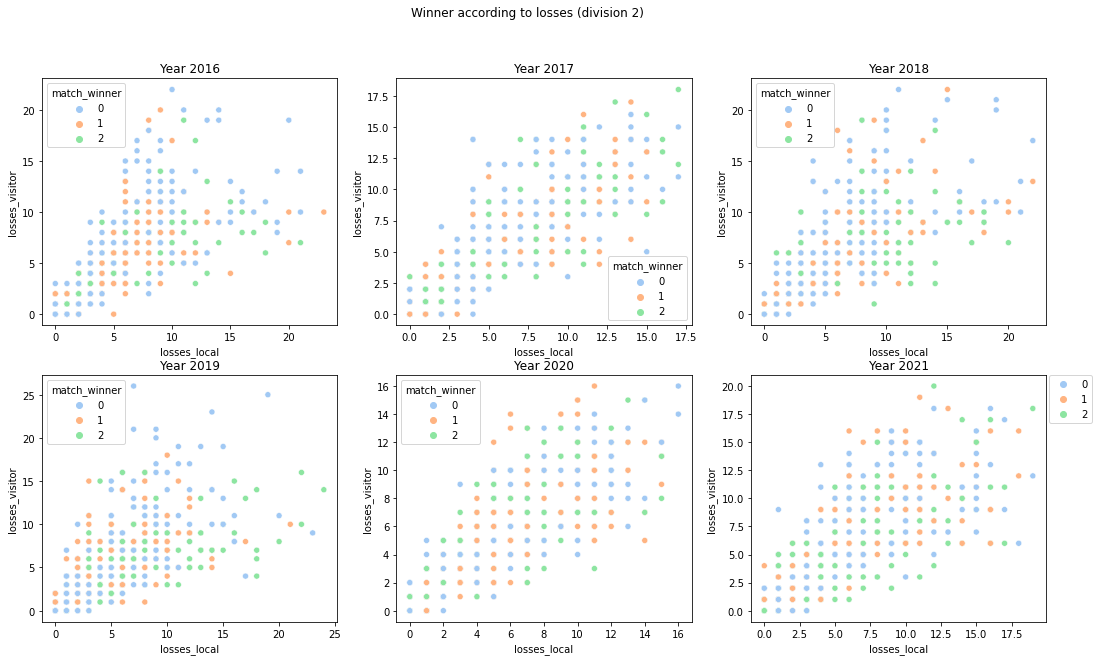

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Winner according to losses (division 2)')

axes[0,0].set_title('Year 2016')
axes[0,1].set_title('Year 2017')
axes[0,2].set_title('Year 2018')
axes[1,0].set_title('Year 2019')
axes[1,1].set_title('Year 2020')
axes[1,2].set_title('Year 2021')


sns.scatterplot(ax=axes[0, 0], data=plotting_div2_2016, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_div2_2017, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 2], data=plotting_div2_2018, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_div2_2019, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_div2_2020, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 2], data=plotting_div2_2021, x="losses_local", y="losses_visitor", hue="match_winner", palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

#### Avg 1st division

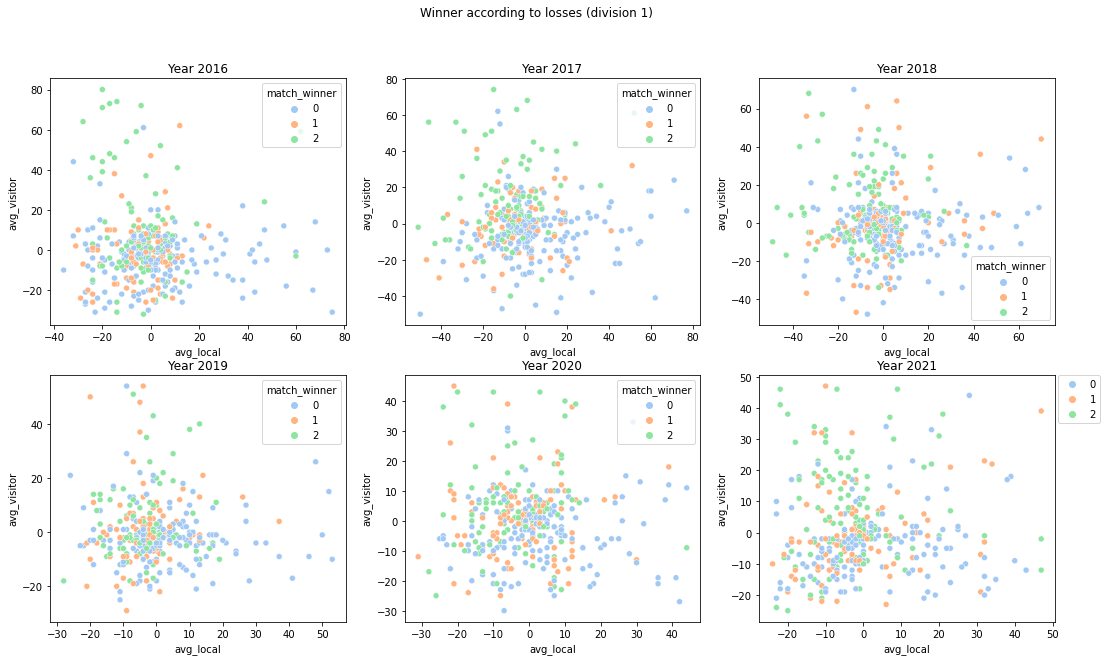

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Winner according to losses (division 1)')

axes[0,0].set_title('Year 2016')
axes[0,1].set_title('Year 2017')
axes[0,2].set_title('Year 2018')
axes[1,0].set_title('Year 2019')
axes[1,1].set_title('Year 2020')
axes[1,2].set_title('Year 2021')

sns.scatterplot(ax=axes[0, 0], data=plotting_div1_2016, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_div1_2017, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 2], data=plotting_div1_2018, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_div1_2019, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_div1_2020, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 2], data=plotting_div1_2021, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

#### Avg 2nd division

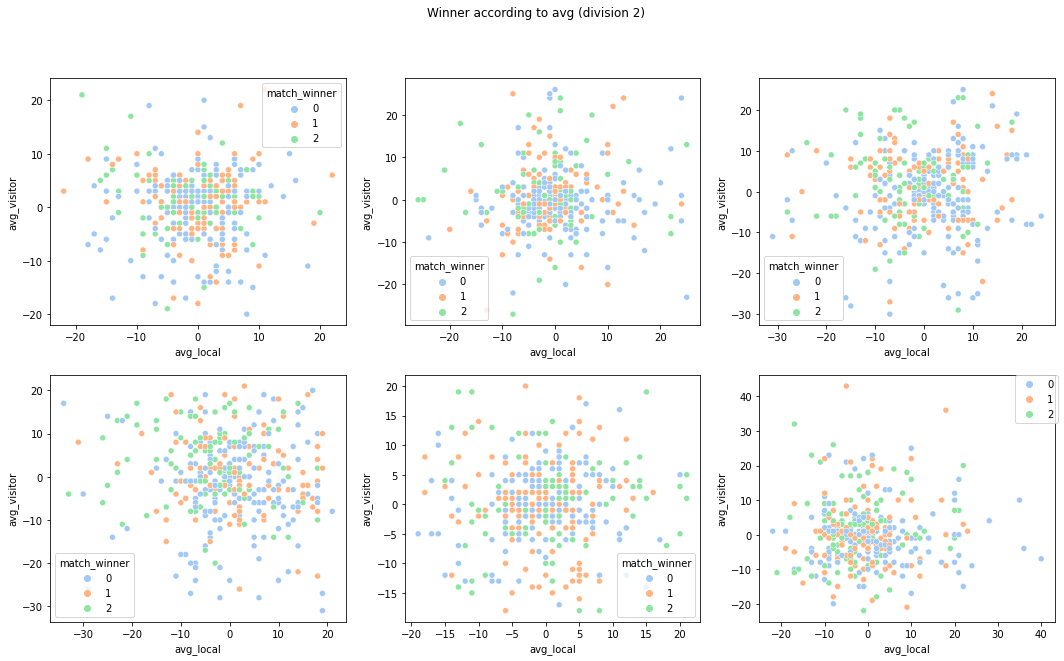

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Winner according to avg (division 2)')

sns.scatterplot(ax=axes[0, 0], data=plotting_div2_2016, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 1], data=plotting_div2_2017, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[0, 2], data=plotting_div2_2018, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 0], data=plotting_div2_2019, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 1], data=plotting_div2_2020, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
sns.scatterplot(ax=axes[1, 2], data=plotting_div2_2021, x="avg_local", y="avg_visitor", hue="match_winner", palette='pastel')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

Meter en un grafico comparando en vez de por años, para un mismo año, avg, wins, losses, points a ver cual es mas visual.

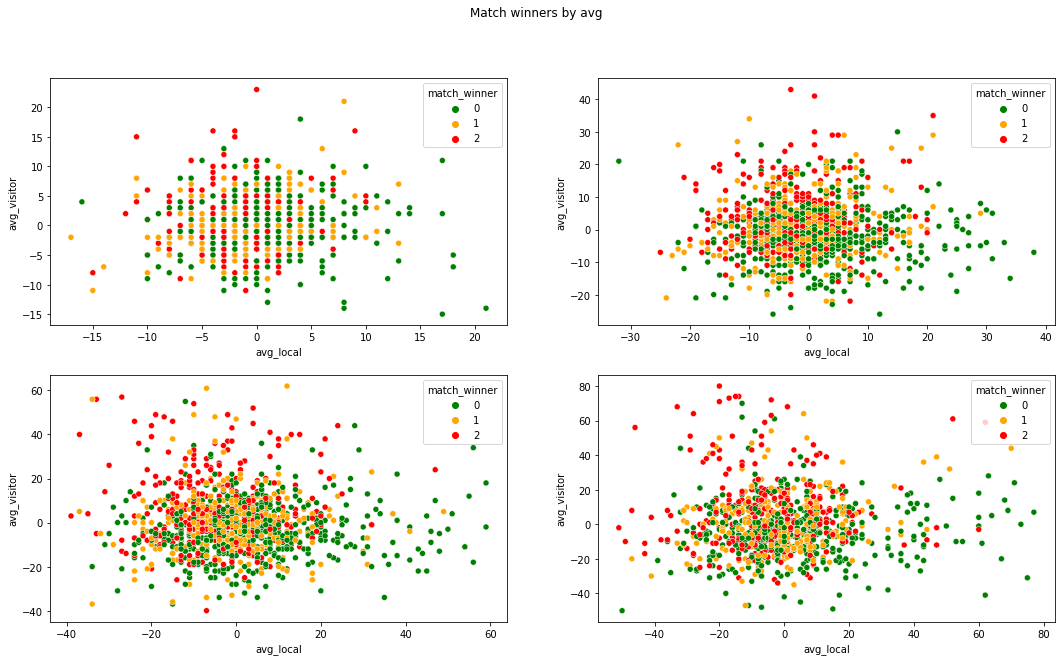

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners by avg')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="avg_local", y="avg_visitor", hue="match_winner",palette=['green','orange','red'] )
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="avg_local", y="avg_visitor", hue="match_winner", palette=['green','orange','red'])
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="avg_local", y="avg_visitor", hue="match_winner", palette=['green','orange','red'])
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="avg_local", y="avg_visitor", hue="match_winner", palette=['green','orange','red'])

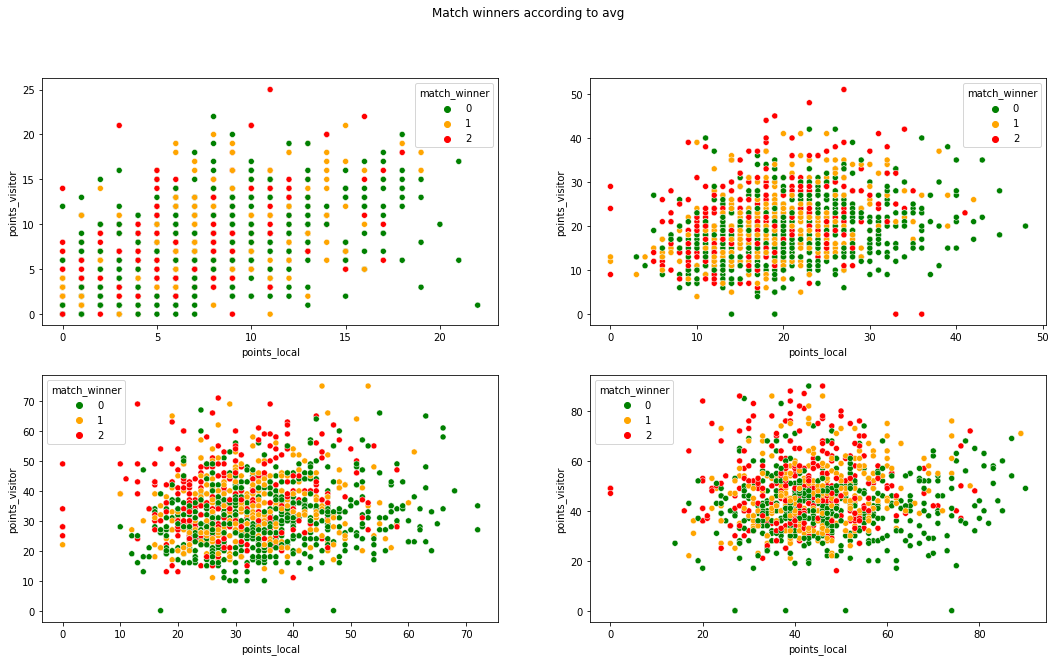

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Match winners according to avg')

sns.scatterplot(ax=axes[0, 0], data=plotting_data_round10, x="points_local", y="points_visitor", hue="match_winner",palette=['green','orange','red'] )
sns.scatterplot(ax=axes[0, 1], data=plotting_data_round10_20, x="points_local", y="points_visitor", hue="match_winner", palette=['green','orange','red'])
sns.scatterplot(ax=axes[1, 0], data=plotting_data_round20_30, x="points_local", y="points_visitor", hue="match_winner", palette=['green','orange','red'])
sns.scatterplot(ax=axes[1, 1], data=plotting_data_round30, x="points_local", y="points_visitor", hue="match_winner", palette=['green','orange','red'])

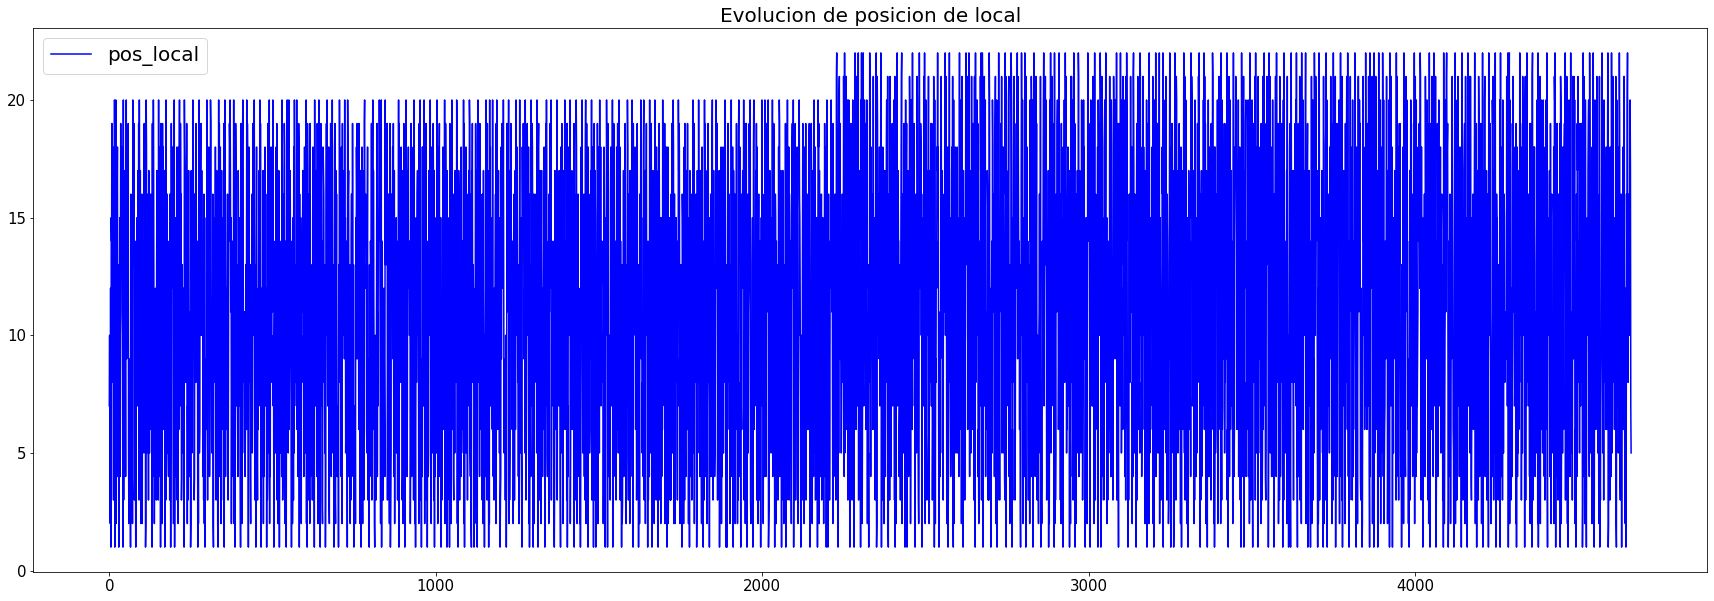

In [26]:
plt.figure(figsize = (30,10))
plt.plot(plotting_data['pos_local'], color = 'blue', label = 'pos_local')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc=2, prop={'size': 20})
plt.title('Evolucion de posicion de local', fontsize = 20, y = 1)
plt.show()

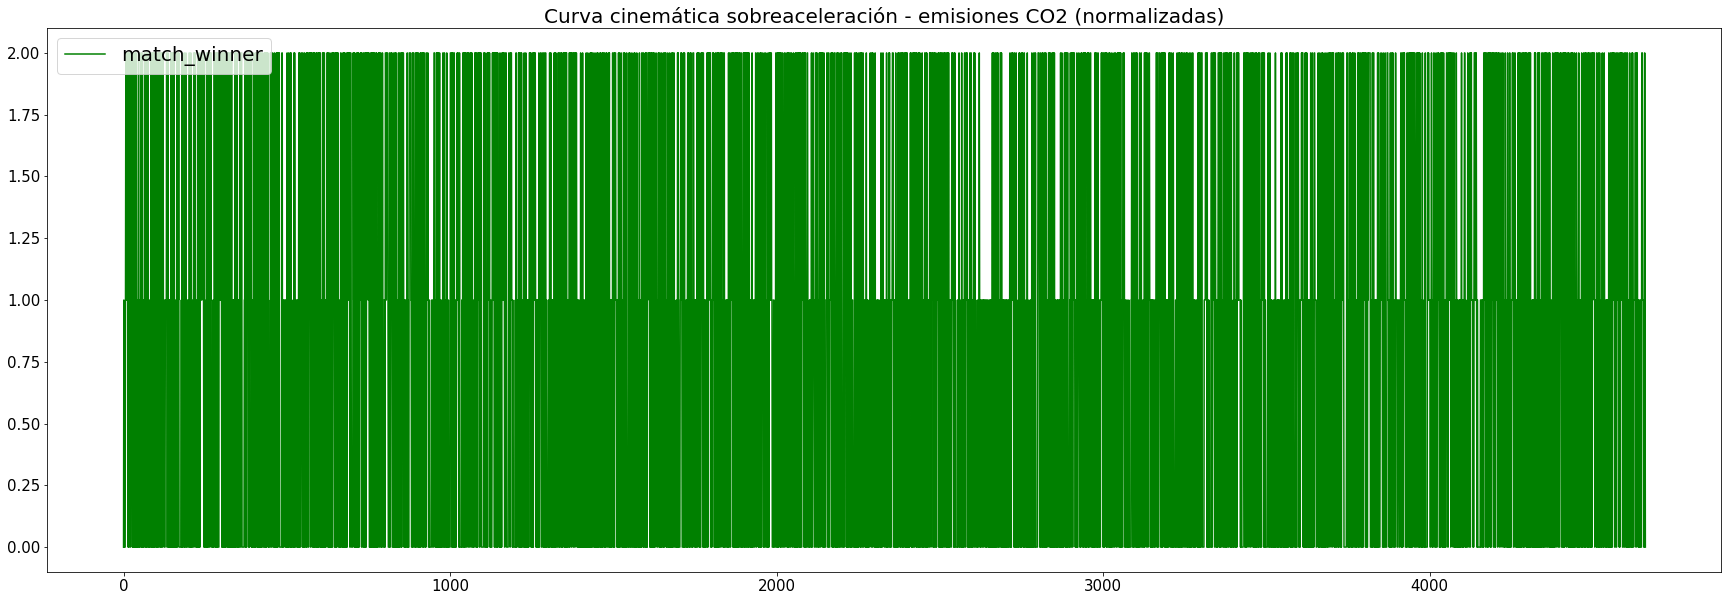

In [27]:
plt.figure(figsize = (30,10))
plt.plot(plotting_data['match_winner'], color = 'green', label = 'match_winner')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc=2, prop={'size': 20})
plt.title('Curva cinemática sobreaceleración - emisiones CO2 (normalizadas)', fontsize = 20, y = 1)
plt.show()

### Correlation